In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Loading the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv('/content/gdrive/MyDrive/Used_Bikes.csv')
print(data)

                                  bike_name     price       city  kms_driven  \
0        TVS Star City Plus Dual Tone 110cc   35000.0  Ahmedabad     17654.0   
1               Royal Enfield Classic 350cc  119900.0      Delhi     11000.0   
2                      Triumph Daytona 675R  600000.0      Delhi       110.0   
3                      TVS Apache RTR 180cc   65000.0  Bangalore     16329.0   
4      Yamaha FZ S V 2.0 150cc-Ltd. Edition   80000.0  Bangalore     10000.0   
...                                     ...       ...        ...         ...   
32643                Hero Passion Pro 100cc   39000.0      Delhi     22000.0   
32644                  TVS Apache RTR 180cc   30000.0     Karnal      6639.0   
32645              Bajaj Avenger Street 220   60000.0      Delhi     20373.0   
32646             Hero Super Splendor 125cc   15600.0     Jaipur     84186.0   
32647                    Bajaj Pulsar 150cc   22000.0       Pune     60857.0   

             owner   age  power        

# Checking for the Null values

In [ ]:
data.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

# Organizing the Variables

In [ ]:
df = data[['brand','kms_driven','age','power','owner','price']]
print(df)

               brand  kms_driven   age  power        owner     price
0                TVS     17654.0   3.0  110.0  First Owner   35000.0
1      Royal Enfield     11000.0   4.0  350.0  First Owner  119900.0
2            Triumph       110.0   8.0  675.0  First Owner  600000.0
3                TVS     16329.0   4.0  180.0  First Owner   65000.0
4             Yamaha     10000.0   3.0  150.0  First Owner   80000.0
...              ...         ...   ...    ...          ...       ...
32643           Hero     22000.0   4.0  100.0  First Owner   39000.0
32644            TVS      6639.0   9.0  180.0  First Owner   30000.0
32645          Bajaj     20373.0   6.0  220.0  First Owner   60000.0
32646           Hero     84186.0  16.0  125.0  First Owner   15600.0
32647          Bajaj     60857.0  13.0  150.0  First Owner   22000.0

[32648 rows x 6 columns]


# Changing the Strings to Numerical Values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df['owner'])
df['owner_new']=le.fit_transform(data['owner'])
df.drop(['owner'],axis=1,inplace=True)
df.columns

<ipython-input-5-a62a35512117>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner_new']=le.fit_transform(data['owner'])
<ipython-input-5-a62a35512117>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['owner'],axis=1,inplace=True)


Index(['brand', 'kms_driven', 'age', 'power', 'price', 'owner_new'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df['brand'])
df['brand_new']=le.fit_transform(data['brand'])
df.drop(['brand'],axis=1,inplace=True)
df.columns

<ipython-input-6-75191925e8b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand_new']=le.fit_transform(data['brand'])
<ipython-input-6-75191925e8b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['brand'],axis=1,inplace=True)


Index(['kms_driven', 'age', 'power', 'price', 'owner_new', 'brand_new'], dtype='object')

In [ ]:
df.isnull().sum()

kms_driven    0
age           0
power         0
price         0
owner_new     0
brand_new     0
dtype: int64

# Dividing the Components based on the types of variables

In [ ]:
x=df[['brand_new','kms_driven','age','power','owner_new']]
print(x)
y=df.drop(columns=['brand_new','kms_driven','age','power','owner_new'])
print(y)

       brand_new  kms_driven   age  power  owner_new
0             19     17654.0   3.0  110.0          0
1             17     11000.0   4.0  350.0          0
2             20       110.0   8.0  675.0          0
3             19     16329.0   4.0  180.0          0
4             21     10000.0   3.0  150.0          0
...          ...         ...   ...    ...        ...
32643          5     22000.0   4.0  100.0          0
32644         19      6639.0   9.0  180.0          0
32645          1     20373.0   6.0  220.0          0
32646          5     84186.0  16.0  125.0          0
32647          1     60857.0  13.0  150.0          0

[32648 rows x 5 columns]
          price
0       35000.0
1      119900.0
2      600000.0
3       65000.0
4       80000.0
...         ...
32643   39000.0
32644   30000.0
32645   60000.0
32646   15600.0
32647   22000.0

[32648 rows x 1 columns]


# Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.002,random_state=5)
print(x_train)

       brand_new  kms_driven   age  power  owner_new
21360          5     84186.0  16.0  125.0          0
7200           1     25000.0  12.0  125.0          0
3055          21      8800.0   3.0  250.0          0
32251         21     27000.0   9.0  150.0          0
31273          1     20245.0  11.0  220.0          2
...          ...         ...   ...    ...        ...
3046          17     48000.0   8.0  500.0          2
26301          1     60857.0  13.0  150.0          0
20463          5     35000.0  19.0  100.0          2
18638          1     20245.0  11.0  220.0          2
2915           1     25388.0  11.0  220.0          0

[32582 rows x 5 columns]


# Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

# Model Selection

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(1,weights="distance")
knn.fit(x_train_std,y_train)
z=knn.predict(x_test_std)
print(z)

[ 23000.  25000.  50000.  23000.  35000.  25000.  86000.  39000.  22000.
  20000.  32000.  11900.  35000.  15600.  70000.  23000.  80000.  70000.
  39300.  20000.  10000.  48000. 196700.  95500.  70000.  95500.  35000.
  32000.  41000.  25000. 123000.  15600.  80000.  23000.  11900.  55005.
  10000. 115000.  75000.  46500.  50000.  12500.  55005.  50000.  35000.
 196700.  15000.  43000. 450000.  25000.  80000.  80000.  87000.  15600.
  41000.  14000.  32000.  25000.  23000.  35000.  43000. 105000.  41000.
  10000. 105000.  35000.]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Evaluation Metrics

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Accuracy : {}'.format(accuracy_score(y_test,z)*100))
print('precision : {}'.format(precision_score(y_test,z,average='macro')*100))
print('recall_score : {}'.format(recall_score(y_test,z,average='macro')*100))
print('f1_score : {}'.format(f1_score(y_test,z,average='macro')*100))

Accuracy : 93.93939393939394
precision : 79.41176470588235
recall_score : 78.4313725490196
f1_score : 78.82352941176471


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print(y_pred)

[[ 15302.75207179]
 [ 11260.54421905]
 [ 78243.64714538]
 [ 15302.75207179]
 [ 12716.91509763]
 [ 34829.65862761]
 [ 59801.11872766]
 [ 16188.27941533]
 [ 20610.8941588 ]
 [ 18072.44044071]
 [ 15407.39094451]
 [ 23704.81309612]
 [ 12716.91509763]
 [ -6570.23578414]
 [121645.92127998]
 [ 15302.75207179]
 [ 87417.3384458 ]
 [ 63336.48777254]
 [ 39378.48356319]
 [  6277.22371102]
 [ 16133.26015444]
 [ 62011.49547751]
 [177509.29682199]
 [144113.21971149]
 [121645.92127998]
 [144113.21971149]
 [ 12716.91509763]
 [ 15407.39094451]
 [ 55319.56339319]
 [ 30342.86711583]
 [ 93979.40641384]
 [ -6570.23578414]
 [ 87417.3384458 ]
 [ 15302.75207179]
 [ 23704.81309612]
 [ 87555.52718861]
 [ 16133.26015444]
 [152790.2726725 ]
 [ 47474.19577506]
 [ 25713.18802976]
 [ 78243.64714538]
 [-15485.01401491]
 [ 87555.52718861]
 [ 78243.64714538]
 [ 12716.91509763]
 [177509.29682199]
 [-31192.34983741]
 [ 31352.34331512]
 [384675.86372224]
 [ 34829.65862761]
 [ 87417.3384458 ]
 [ 87417.3384458 ]
 [ 56642.378

# Data Visualizations

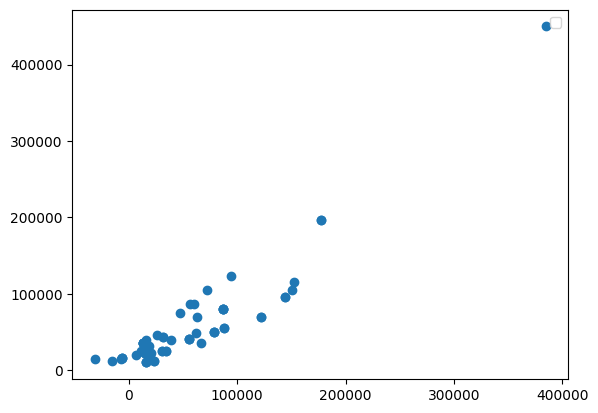

In [ ]:
plt.scatter(y_pred,z,alpha=1)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print('r2_score : {}'.format(r2_score(y_test,y_pred,sample_weight=None,multioutput='uniform_average')))

r2_score : 0.8476831709958359


Using Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_std,y_train)
pred=nb.predict(x_test_std)
print(pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 34200.  15500.  54200.  34200.  16500.  26200.  87000.  30900.  11500.
  15900.  30900.  11900.  16500.  15600. 107100.  34200.  54200.  40100.
  39300.  30900.  11500.  43600. 196700.  95500. 107100.  95500.  16500.
  30900.  41000.  27500. 123000.  15600.  54200.  34200.  11900.  55005.
  11500. 133300.  41300.  87000.  54200.  12500.  55005.  54200.  16500.
 196700.  15000.  34850. 480000.  26200.  54200.  54200.  87000.  15600.
  41000.  18900.  87000.  27500.  34200.  16500.  34850. 105200.  41000.
  11500.  51500.  43600.]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Accuracy : {}'.format(accuracy_score(y_test,pred)*100))
print('precision : {}'.format(precision_score(y_test,pred,average="weighted")))
print('recall_score : {}'.format(recall_score(y_test,pred,average="weighted")))
print('f1_score : {}'.format(f1_score(y_test,pred,average='weighted')))
l=[]

Accuracy : 27.27272727272727
precision : 0.26136363636363635
recall_score : 0.2727272727272727
f1_score : 0.2636363636363636


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


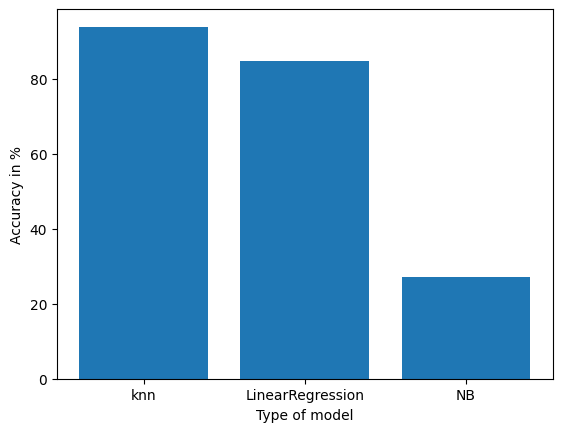

In [ ]:
import seaborn as sns
l=[93.93939393939394,84.76831709958336,27.272727272727]
l1=["knn","LinearRegression","NB"]
l3=[93.93939393939394,79.41176470588235,93.93939393939394,78.8235294117647]
l2=[27.27272727272727,25,27.27272727272727,18.8]
plt.bar(l1,l,linestyle="-")
plt.xlabel("Type of model")
plt.ylabel("Accuracy in %")
plt.show()

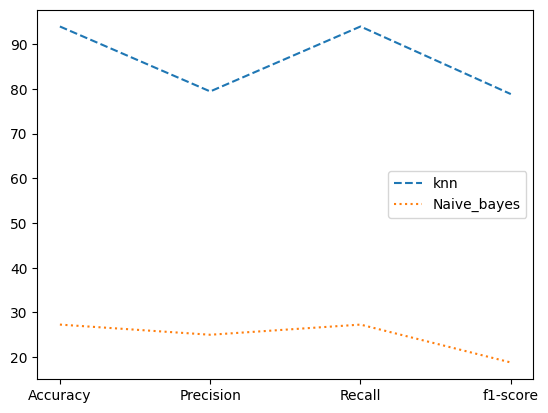

In [ ]:
x=["Accuracy","Precision","Recall","f1-score"]
plt.plot(x,l3,label="knn",linestyle="dashed")
plt.plot(x,l2,label="Naive_bayes",linestyle=":")
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1, weights="distance")
knn.fit(x_train_std, y_train)
z = knn.predict(x_test_std)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, z)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, z)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, z))))
print('R-squared: {:.2f}'.format(r2_score(y_test, z)))

Mean Absolute Error: 772.73
Mean Squared Error: 18143939.39
Root Mean Squared Error: 4259.57
R-squared: 1.00


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights="distance")
knn.fit(x_train_std, y_train)
z = knn.predict(x_test_std)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, z)))
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, z)))
print('R-squared: {:.2f}'.format(r2_score(y_test, z)))

Mean Squared Error: 18143939.39
Mean Absolute Error: 772.73
R-squared: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train_std,y_train)
predx=bnb.predict(x_test_std)
print(predx)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 32000.  20000.  50000.  32000.  30000.  25000.  32000.  32000.  25000.
  20000.  32000.  25000.  30000.  25000.  70000.  32000. 450000.  43000.
  43000.  18000.  25000.  43000. 105000. 105000.  70000. 105000.  30000.
  32000.  41000.  43000. 105000.  25000. 450000.  32000.  25000. 450000.
  25000. 105000.  48000.  32000.  50000.  15000. 450000.  50000.  30000.
 105000.  15000.  43000. 450000.  25000. 450000. 450000.  32000.  25000.
  41000.  15000.  32000.  43000.  32000.  30000.  43000. 105000.  41000.
  25000.  32000.  35000.]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Accuracy : {}'.format(accuracy_score(y_test,predx)*100))
print('precision : {}'.format(precision_score(y_test,predx,average="micro")))
print('recall_score : {}'.format(recall_score(y_test,predx,average="weighted")))
print('f1_score : {}'.format(f1_score(y_test,predx,average='weighted')))
l=[]

Accuracy : 30.303030303030305
precision : 0.30303030303030304
recall_score : 0.30303030303030304
f1_score : 0.23897907647907649


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

x=df[['brand_new','kms_driven','age','power','owner_new']]
y=df.drop(columns=['brand_new','kms_driven','age','power','owner_new'])

X = np.array(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_classifier.fit(X_train, y_train)

y_pred11 = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred11)
report = classification_report(y_test, y_pred11)

print("Accuracy:", accuracy)
#print("Classification Report:\n", report)


<ipython-input-24-8c86844532e6>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_classifier.fit(X_train, y_train)


Accuracy: 0.8142419601837673


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

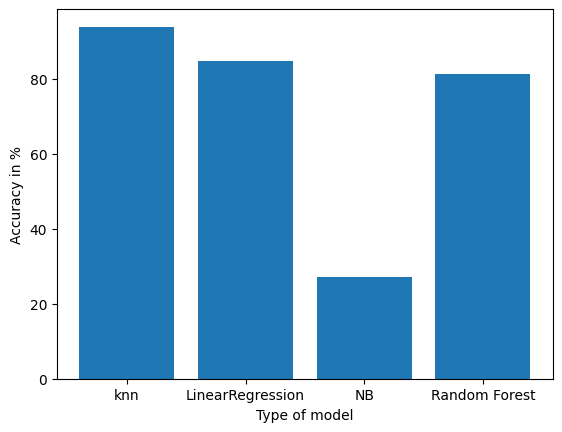

In [ ]:
import seaborn as sns
l=[93.93939393939394,84.76831709958336,27.272727272727,81.42419601837673]
l1=["knn","LinearRegression","NB",'Random Forest']
l3=[93.93939393939394,79.41176470588235,93.93939393939394,78.8235294117647]
l2=[27.27272727272727,25,27.27272727272727,18.8]
plt.bar(l1,l)
plt.xlabel("Type of model")
plt.ylabel("Accuracy in %")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

decision_tree_classifier = DecisionTreeClassifier(random_state=42)

decision_tree_classifier.fit(X_train, y_train)

y_pred = decision_tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
#print("Classification Report:\n", report)


Accuracy: 0.8361408882082695


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

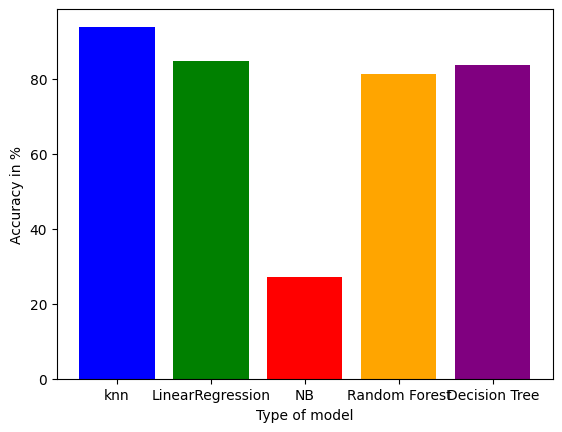

In [ ]:
import seaborn as sns
l=[93.93939393939394,84.76831709958336,27.272727272727,81.42419601837673,83.61408882082695]
l1=["knn","LinearRegression","NB",'Random Forest','Decision Tree']
l3=[93.93939393939394,79.41176470588235,93.93939393939394,78.8235294117647]
colors = ['blue', 'green', 'red','orange','purple']
l2=[27.27272727272727,25,27.27272727272727,18.8]
plt.bar(l1,l,color=colors)
plt.xlabel("Type of model")
plt.ylabel("Accuracy in %")
plt.show()